Jorge Mario Becerra

Vhanessa Cardona

# Regresión Logística: Predicción de Enfermedad Coronaria

A continuación se observa un problema de clasificación binaria y se desea analizar una posible solución a partir de un modelo de regresión logística. Se busca implementar el algoritmo mencionado, inicialmente empleando la librería SciKit-Learn para luego desarrollar el mismo proceso de entrenamiento manualmente (Descenso de Gradiente Estocástico).

También se introducirán algunos conceptos para lidiar con datos desbalanceados como: matriz de confusión, curva ROC, y algunas otras métricas importantes.

Debe completar las celdas vacías y seguir las instrucciones anotadas en el cuaderno.

La fecha límite de entrega es el día **20 de septiembre** y se realizará a través de Bloque Neón.

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sn
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, auc
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler, RobustScaler
import matplotlib.mlab as mlab
%matplotlib inline

In [ ]:
heart_df=pd.read_csv("heartDisease/framingham.csv")
heart_df.dropna(axis=0,inplace=True)
heart_df.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
print(f'Se tienen {len(heart_df)} datos.')

Se tienen 3749 datos.


### Análisis de Distribución de Clases

En el diagrama a continuación puede observar un claro desbalanceo de los datos, en pasos posteriores hablaremos al respecto.

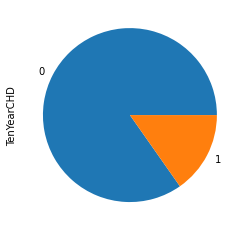

In [ ]:
heart_df['TenYearCHD'].value_counts().plot(kind='pie')

## Descripción de Variables

Cada atributo es un factor potencial de riesgo. Existen factores demográficos, conductuales y médicos.

- Demográfico:

    - male: masculino (1) o femenino (0); (Nominal)

    - age: edad del paciente; (Continuo: aunque las edades registradas se han truncado a números enteros, el concepto de edad es continuo)

- Comportacional:

    - currentSmoker: si el paciente es o no fumador actual (nominal)

    - cigsPerDay: la cantidad de cigarrillos que la persona fumó en promedio en un día (se puede considerar continuo ya que uno puede tener cualquier cantidad de cigarrillos, incluso medio cigarrillo).

- Historia médica:

    - BPMeds: si el paciente estaba o no tomando medicación para la presión arterial (nominal)

    - prevalentStroke: si el paciente había tenido previamente un accidente cerebrovascular o no (nominal)

    - prevalentHyp: si el paciente era hipertenso (nominal)

    - diabetes: si el paciente tenía diabetes o no (nominal)

- Estado Médico actual:

    - totChol: nivel de colesterol total (continuo)

    - sysBP: presión arterial sistólica (continua)

    - diaBP: presión arterial diastólica (continua)

    - IMC: índice de masa corporal (continuo)

    - heartRate: frecuencia cardíaca (continua: en la investigación médica, variables como la frecuencia cardíaca, aunque de hecho son discretas, se consideran continuas debido a la gran cantidad de valores posibles).

    - glucose: nivel de glucosa (continuo)

- **Variable a Predecir**

    - TenYearCHD: Riesgo de padecer enfermedad coronaria 10 años en el futuro (binario: "1", significa "Sí", "0" significa "No")

In [ ]:
x = heart_df.iloc[:,:-1]
y = heart_df.iloc[:,-1]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=22)

In [ ]:
scaler = MinMaxScaler() # Utilice un MinMaxScaler #
x_train = scaler.fit_transform(x_train) # Ajuste y Aplique el Escalamiento (función fit_transform) #
x_test = scaler.transform(x_test) # Aplique el Escalamiento (función transform) #

## Parte 1

A continuación, debe utilizar la función `LogisticRegression` de SciKit-Learn para obtener un primer modelo de regresión logística y calcular su precisión a partir de la función `accuracy_score`.

Obtenga resultados sobre los datos de entrenamiento y los datos de prueba. Concluya al respecto.

In [ ]:
logreg = LogisticRegression() # Modelo de Regresión Logística #
logreg.fit(x_train, y_train) # Entrenamiento sobre los Datos #
y_pred = logreg.predict(x_test) # Predicción de Etiquetas #

print(f'Precisión inicial: {accuracy_score(y_test,y_pred)}')

Precisión inicial: 0.844


### Matriz de Confusión

Como recordará, la información en este dataset no posee una distribución de clases balanceada. La matriz de confusión es una herramienta que permite analizar el comportamiento del modelo para estos datos.

Puede encontrar más información en este artículo: [Understanding Confusion Matrix](https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62)

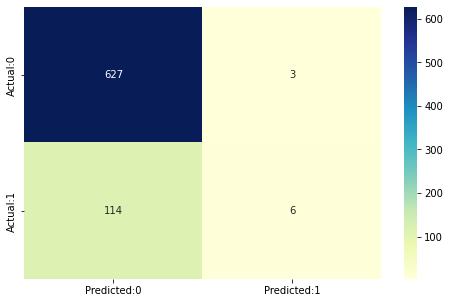

In [ ]:
cm = confusion_matrix(y_test,y_pred)
conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sn.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

### Tratamiento de Datos Desbalanceados

En casos de estudio como identificación de tendencias patológicas, es común tener datos desbalanceados, o en los cuales la gravedad de cometer [errores tipo I o tipo II](https://www.simplypsychology.org/type_I_and_type_II_errors.html) son bastante diferentes. En muchos casos, se puede preferir cometer cierto tipo de error sobre el otro. Para trabajar con estos problemas, se suele preferir sacrificar algo de [precisión](https://developers.google.com/machine-learning/crash-course/classification/accuracy) del modelo, a cambio de una mejora en términos prácticos.

Este proceso se realiza a partir de la modificación del umbral a partir del cual se decide si un dato pertenece a una clase u otra. Utilice la función `binarize` para obtener valores de `0` ó `1` según las probabilidades de las predicciones realizadas utilizando la función `model.predict_proba`.

Algunas métricas utilizadas para interpretar el rendimiento del modelo son las siguientes:

- F1Score
- TP Rate / Recall / Sensitividad
- TN Rate / Especificidad

Puede encontrar más información sobre estas métricas en los artículos:
- [Accuracy, Precision, Recall or F1?](https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9)
- [Sensitivity Vs Specificity In Data Science](https://medium.com/fintechexplained/sensitivity-vs-specificity-in-data-science-2f673039dbd1)

In [ ]:
from sklearn.preprocessing import binarize

umbrales = np.arange(0.05, 1, 0.05) # Vector que Contiene los Umbrales a Analizar #

for umbral in umbrales:
    cm2 = 0
    y_pred_prob_yes = logreg.predict_proba(x_test) # Utilice la función predict_proba para calcular las probabilidades de pertenecer a la clase 1 #
    y_pred2 = binarize(y_pred_prob_yes, threshold=umbral)[:,1] # Utilice la función binarize para convertir las probabilidades a clases 0 y 1 #
    cm2 = confusion_matrix(y_test,y_pred2)
    print(f'''->Para un umbral de {round(umbral,4)} tenemos esta matriz de confusión:
{cm2}
Con {cm2[0,0]+cm2[1,1]} predicciones correctas y {cm2[1,0]} falsos positivos.
Sensitividad: {round(cm2[1,1]/(float(cm2[1,1]+cm2[1,0])), 4)} \nEspecificidad: {round(cm2[0,0]/(float(cm2[0,0]+cm2[0,1])), 4)}\nF1-score: {f1_score(y_test,y_pred2)} \n''')


->Para un umbral de 0.05 tenemos esta matriz de confusión:
[[107 523]
 [  8 112]]
Con 219 predicciones correctas y 8 falsos positivos.
Sensitividad: 0.9333 
Especificidad: 0.1698
F1-score: 0.29668874172185433 

->Para un umbral de 0.1 tenemos esta matriz de confusión:
[[306 324]
 [ 18 102]]
Con 408 predicciones correctas y 18 falsos positivos.
Sensitividad: 0.85 
Especificidad: 0.4857
F1-score: 0.3736263736263736 

->Para un umbral de 0.15 tenemos esta matriz de confusión:
[[438 192]
 [ 35  85]]
Con 523 predicciones correctas y 35 falsos positivos.
Sensitividad: 0.7083 
Especificidad: 0.6952
F1-score: 0.4282115869017632 

->Para un umbral de 0.2 tenemos esta matriz de confusión:
[[512 118]
 [ 63  57]]
Con 569 predicciones correctas y 63 falsos positivos.
Sensitividad: 0.475 
Especificidad: 0.8127
F1-score: 0.3864406779661017 

->Para un umbral de 0.25 tenemos esta matriz de confusión:
[[545  85]
 [ 75  45]]
Con 590 predicciones correctas y 75 falsos positivos.
Sensitividad: 0.375 
Espe

En esta parte se decide adicionar la métrica F1-score la cual balancea los Falsos Positivos y los Falsos Negativos. Esta métrica permite determinar cual modelo tiene en general menos error (tipo 1 y tipo 2) sin dar prioridad a ninguno. 


De esto se encuentra que el mejor umbral es 0.15 ya que tiene un valor de F1-score de 0.4282 y, como se observa en su matriz de confunsión correspondiente, los errores tipo 1 y tipo 2 son menores que en los otros casos.

Por otra parte, un criterio que facilita el visualizar este trade-off se conoce como la Curva ROC, en donde se ubican múltiples puntos para distintos valores del umbral de clasificación. Puede leer el artículo a continuación para una explicación más detallada:
- Curva ROC: [Understanding AUC - ROC Curve](https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5)

Coordenadas proporción: (0.4936507936507937,0.825)
Proporción: 1.6712218649517683

AUC: 0.7348809523809523


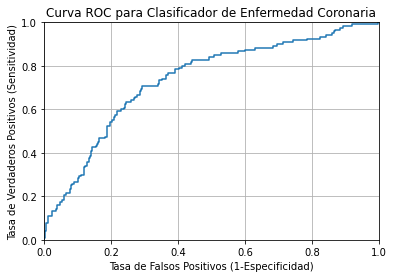

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_yes[:,1])
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('Curva ROC para Clasificador de Enfermedad Coronaria')
plt.xlabel('Tasa de Falsos Positivos (1-Especificidad)')
plt.ylabel('Tasa de Verdaderos Positivos (Sensitividad)')
plt.grid(True)

for i in range(len(fpr)):
  if fpr[i] >= 0.445:
    break

print(f'Coordenadas proporción: ({fpr[i]},{tpr[i]})\nProporción: {tpr[i]/fpr[i]}\n')
print(f'AUC: {auc(fpr,tpr)}')

**Observe la gráfica, y teniendo en cuenta los resultados concluya sobre la proporción que se puede considerar más adecuada en este contexto.**

Dado que el valor de AUC (área debajo de la curva) es 0.7348 esto indica que el modelo tiene una probabilidad del 73.48% de distinguir entre una clase u otra.


Ahora, para determinar la proporción más adecuada en el contexto, es primero necesario analizar la gráfica e identicar dónde se encuentra la parte mayor curvatura (aproximandamente entre 0.10 y 0.5 en el eje `x`).

En términos del contexto, los verdaderos positivos corresponden a personas que tienen riesgo de padecer enfermedad coronaria 10 años en el futuro y el modelo lo predijo, mientras que los falsos positivos son personas que no tienen riesfo de padecerla pero que modelo predijo que si. En este contexto es importante poder identificar la mayor cantidad de personas que pueden sufrir la enfermedad (verdaderos positivos) con la finalidad de que hagan cambios en sus hábitos que le permitan disminuir el riesgo y hasta evitar sufirir la enfermedad. También es impotante no clasificar a todas las personas con riesgo de tener la enfermedad ya que un gran porcentaje de ellas no la tendrá; es en este punto donde se requiere balancear el hecho de detectar la mayor cantidad de personas que tienen riesgo de sufrirla (verdaderos positivos), y minimizar la cantidad de personas que el modelo predice mal (falsos positivos).

Para esto, se analiza la gráfica y se tiene que el mayor crecimiento en el eje `y` se da entre `0<x<0.5` por lo que la proporción que se propone se encuentra en las coordenadas (`0.493 , 0.825`)




## Parte 2

Ahora usted debe desarrollar su propia implementación del método Descenso de Gradiente estocástico para un modelo de regresión logística. Realice el entrenamiento a partir del 80% de los datos. Al final del entrenamiento, en la lista errores se deben tener los valores de la función de error para cada iteración y así poder observar el progreso gráficamente.

In [ ]:
import random
listTasas = []
listPrecision= []
listF1 = []
listCM = []

dir= {}

np.random.seed(22)
X_train_array = x_train
y_train_array = y_train.values

w0 = np.random.rand(X_train_array.shape[1]) # Inicialización de w #

w = w0.copy()
# Inicialización de criterio de parada (al disminuir el valor de eps, se aumenta la precisión y el tiempo de procesamiento)
eps = 1e-5
error = 100
dif = 100

def sigma(w,x):
    res_sigmoid = 1/(1+np.exp((-1)*x.dot(np.transpose(w)))) # Salida de la función sigmoide #
    return res_sigmoid

tasas = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.5, 1, 5, 10] # Defina un vector que contenga las tasas que desea probar #
for tasa in tasas:
    # while error>eps:         # Criterio de parada 1 #
    for j in range (0, 100000):  # Criterio de parada 2 #
      i = random.randint(0, np.size(y_train_array)-1) # Posición aleatoria # 
      xActual = X_train_array[i]
      yActual = y_train_array[i]

      g = sigma(w0, xActual)
      error = g - yActual
      w = w0 - tasa*error*xActual
      w0 = w

    X_test_array = x_test
    y_test_array = y_test.values

    y_pred = np.zeros(len(x_test))

    for i in range(0,len(x_test)):
      prob = sigma(w,X_test_array[i])
      if prob>0.5:
        y_pred[i] = 1
      else:
        y_pred[i] = 0
    
    listTasas.append(tasa)
    listPrecision.append( round(accuracy_score(y_test,y_pred),3))
    listF1.append(round(f1_score(y_test,y_pred),4))
    listCM.append(confusion_matrix(y_test,y_pred))

dir['Tasa'] = listTasas
dir['Precisión'] = listPrecision
dir['F1-score'] = listF1
pd.set_option('max_colwidth', 120)
df_dir = pd.DataFrame(dir)
display(df_dir)

,Tasa,Precisión,F1-score
0,0.000001,0.160,0.2759
1,0.000010,0.160,0.2759
2,0.000100,0.840,0.0000
3,0.001000,0.840,0.0164
4,0.010000,0.833,0.0458
5,0.100000,0.832,0.0870
6,0.500000,0.815,0.1576
7,1.000000,0.708,0.4000
8,5.000000,0.825,0.1088
9,10.000000,0.837,0.0896


Al analizar los diferentes resultados que se tienen al variar el valor de la tasa de aprendizaje se observa que cuando la tasa de aprendizaje es muy pequeña, el modelo no alcanza a converger en el número de pasos que se tienen y por eso la matriz de confusión que se tiene clasifica todos los datos como positivos (1) o todos como negativos (0) por lo que el modelo no funciona.

Al aumentar el valor de la tasa el valor de f1-score mejora significativamente, para lo cual se observa que el mejor resultado de esta métrica se obtiene cuando la tasa se encuentra entre 1 y 10. En el caso que se presenta se obtuvo el mejor con tasa = 1.

A continuación se presenta la matriz de confusión del modelo con el mejor valor de f1-score ya que como se mencionó anteriormenete esta métrica balancea los errores tipo 1 y tipo 2

## Matriz de Confusión

Observe y analice la matriz de confusión para su mejor modelo. Escriba claramente sus conclusiones.

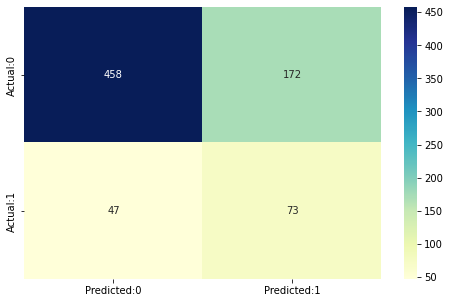

In [ ]:
index = listF1.index(max(listF1))
conf_matrix = pd.DataFrame(data=listCM[index],columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])

plt.figure(figsize = (8,5))
sn.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

Se puede observar que el modelo logra identificar más de la mitad de los pacientes que tienen riesgo de padecer de la enfemedad y, la cantidad de pacientes que no tienen riesgo y el modelo las clasifica como que si lo tienen es mucho menor en comparación a la totalidad de las personas que no tienen riesgo de padecer la información.


En conclusión, se observa que la métrica f1-score es buena en contextos como estos en los que se deben priorizar los dos tipos de error